# 1 Business Understanding

### 1.1 Problem Overview

Customer churn is the act of customers discontinuing their relationship with a company.It represents a major challenge for telecommunications businesses. Acquiring new customers is significantly more expensive than retaining existing ones, and high churn rates directly impact revenue, profitability, and brand perception.

In the increasingly competitive telecom industry, companies must proactively identify customers at risk of churning and take steps to retain them. Traditional retention efforts, such as blanket discount offers or mass outreach, are often inefficient and costly. A data-driven, predictive approach offers a more effective solution.

### 1.2 Business Objective

This project aims to develop a machine learning classification model to **predict whether a customer is likely to churn**, based on their historical and behavioral data. By identifying at-risk customers before they churn, the business can:

- Reduce customer acquisition costs by improving retention
- Optimize marketing and customer service interventions
- Personalize offers to customers who show warning signs
- Understand key drivers of churn for long-term strategic planning

### 1.3 Stakeholders

The primary stakeholders for this project include:

- **Customer Retention Team:** Needs early warnings to take preventive actions (e.g., loyalty offers).
- **Marketing Team:** Can use model insights to target at-risk segments with personalized campaigns.
- **Product Managers:** Gain insights on which service features drive churn to improve user experience.
- **Senior Leadership:** Interested in revenue retention and strategic decision-making based on customer behavior.

### 1.4 Success Criteria

The model will be considered successful if it can:

- Accurately classify customers as likely to churn or not (using precision, recall, and F1-score).
- Provide interpretable results that highlight the most influential features.
- Enable actionable recommendations to reduce churn.

Ultimately, this project supports data-driven decision-making and cost-effective customer engagement in a highly competitive market.


# 2. Data Understanding

### Dataset Overview

The dataset used in this project is from **SyriaTel**, a telecommunications company. It contains customer demographic, behavioral, and account-related features. The target variable is Churn indicating whether a customer has left the service.

- **Type**: Tabular
- **Target variable**: Churn (Binary: 1 = Churned, 0 = Retained)
- **Rows**: [Insert number of records]
- **Columns**: [Insert number of features]
- **Format**: CSV

## Key Features

The features fall into the following categories:

- **Demographics**: gender, SeniorCitizen, Partner, Dependents
- **Service Features**: PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport,StreamingTV, StreamingMovies
- **Account Information**: tenure, Contract, PaperlessBilling, PaymentMethod, MonthlyCharges, TotalCharges
- **Target Variable**: Churn

## Data Types

- **Numerical**: tenure, MonthlyCharges, TotalCharges, SeniorCitizen
- **Categorical**: Contract, InternetService, PaymentMethod, etc.
- **Boolean** (Yes/No): Several columns may be encoded as strings and will need encoding.
- **Target**: Churn (Binary)

## First Look at the Data

Before modeling, we will:

- Inspect data types and basic statistics
- Check for missing or malformed data
- Understand value distributions
- Identify categorical and numerical features
- Explore class imbalance in the target variable

This exploration helps us determine preprocessing strategies such as encoding, scaling, or imputation.

## Why This Step Matters

Understanding your dataset is essential for:

- **Avoiding data leakage**
- **Choosing the right model and metrics**
- **Improving interpretability**
- **Avoiding common pitfalls like inconsistent data types, unexpected nulls, or mislabeled targets**



### 2.1 Load the Dataset
We begin by importing necessary libraries and loading the CSV file from the project’s data/ directory.

In [354]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import seaborn as sns

# Load the dataset
df = pd.read_csv("../data/bigml_59c28831336c6604c800002a.csv")

# Display the shape and the first few rows
print("Dataset shape:", df.shape)
df.head()


Dataset shape: (3333, 21)


,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


### 2.2 Explore Dataset Structure
Let’s take a first look at the structure, data types, and summary of values.

In [355]:
# Basic info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [356]:
# Check for missing values
df.isnull().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

### 2.3 Summary Statistic

In [357]:
# Summary statistics
df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


## 3 Data Cleaning
###  3.1 Data Cleaning Strategy

To ensure high-quality analysis, the dataset will undergo several cleaning steps:

- **Remove Irrelevant Columns**  
  Drop any features that do not contribute meaningfully to churn prediction (e.g., unique IDs or redundant fields).

- **Handle Duplicates**  
  Check for and remove duplicate records to maintain data integrity.

- **Manage Missing Values**  
  Identify missing entries and apply suitable techniques—such as imputation or row removal—based on context and feature importance.

- **Convert Data Types**  
  Ensure all columns have appropriate datatypes (e.g., numerical, categorical) to streamline analysis and modeling.

Clean data forms the foundation for reliable modeling and actionable insights.

### 3.2 Standardize Column Names

In [358]:
#Clean column names: lowercase and replace spaces with underscores
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

# Confirm changes
print(df.columns.tolist())


['state', 'account_length', 'area_code', 'phone_number', 'international_plan', 'voice_mail_plan', 'number_vmail_messages', 'total_day_minutes', 'total_day_calls', 'total_day_charge', 'total_eve_minutes', 'total_eve_calls', 'total_eve_charge', 'total_night_minutes', 'total_night_calls', 'total_night_charge', 'total_intl_minutes', 'total_intl_calls', 'total_intl_charge', 'customer_service_calls', 'churn']


### 3.3 Clean and Encode Categorical Features
In this step, we prepare categorical features for machine learning models by converting string-based values into numerical representations.

In [359]:
# Drop phone_number (not useful)
df.drop('phone_number', axis=1, inplace=True)

### 3.4 One-hot encode 'state' and 'area_code'

In [360]:
# Initialize label encoder
le = LabelEncoder()

# Apply label encoding to 'state' and 'area_code'
df['state'] = le.fit_transform(df['state'])
df['area_code'] = le.fit_transform(df['area_code'])

### 3.5 Final Dataset Overview

In [361]:
# structure check
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   int32  
 1   account_length          3333 non-null   int64  
 2   area_code               3333 non-null   int64  
 3   international_plan      3333 non-null   object 
 4   voice_mail_plan         3333 non-null   object 
 5   number_vmail_messages   3333 non-null   int64  
 6   total_day_minutes       3333 non-null   float64
 7   total_day_calls         3333 non-null   int64  
 8   total_day_charge        3333 non-null   float64
 9   total_eve_minutes       3333 non-null   float64
 10  total_eve_calls         3333 non-null   int64  
 11  total_eve_charge        3333 non-null   float64
 12  total_night_minutes     3333 non-null   float64
 13  total_night_calls       3333 non-null   int64  
 14  total_night_charge      3333 non-null   

In [362]:
# Preview cleaned data
df.sample(5)

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn
1541,26,48,1,no,yes,36,230.9,92,39.25,167.6,121,14.25,270.0,87,12.15,7.6,4,2.05,3,False
2835,32,96,1,no,yes,33,183.3,115,31.16,201.4,87,17.12,177.4,84,7.98,10.4,15,2.81,3,False
2416,12,113,2,no,no,0,156.0,141,26.52,256.8,72,21.83,175.3,123,7.89,11.9,5,3.21,2,False
1173,46,109,0,no,no,0,222.2,113,37.77,218.5,122,18.57,266.0,88,11.97,10.9,5,2.94,1,False
252,25,82,0,no,no,0,207.0,90,35.19,232.9,83,19.80,172.4,108,7.76,9.1,8,2.46,3,False


# 4 Exploratory Data Analysis (EDA)
The main goal at this phase is to understand feature distributions, relationships with churn, and uncover potential drivers behind customer attrition. This helps guide feature selection and modeling.

### 4.1 Imports for EDA

In [363]:
# Set aesthetics
sns.set(style="whitegrid")
plt.style.use("ggplot")

# Enable full-width plots in Jupyter
%matplotlib inline


### 4.2 Target Variable Distribution (churn)

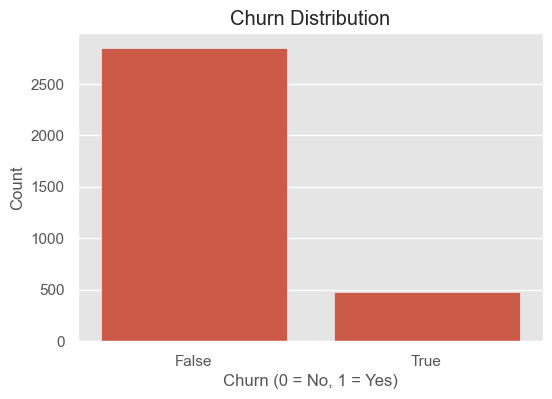

In [364]:
# Plot churn distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='churn', data=df)
plt.title('Churn Distribution')
plt.xlabel('Churn (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()


###  Churn Distribution Overview

This bar chart visualizes the **customer churn** status:

- **False (0 = No churn)**: customers — dominant group.
- **True (1 = Churn)**: customers — minority group.


### 4.3 Numerical Feature Distributions

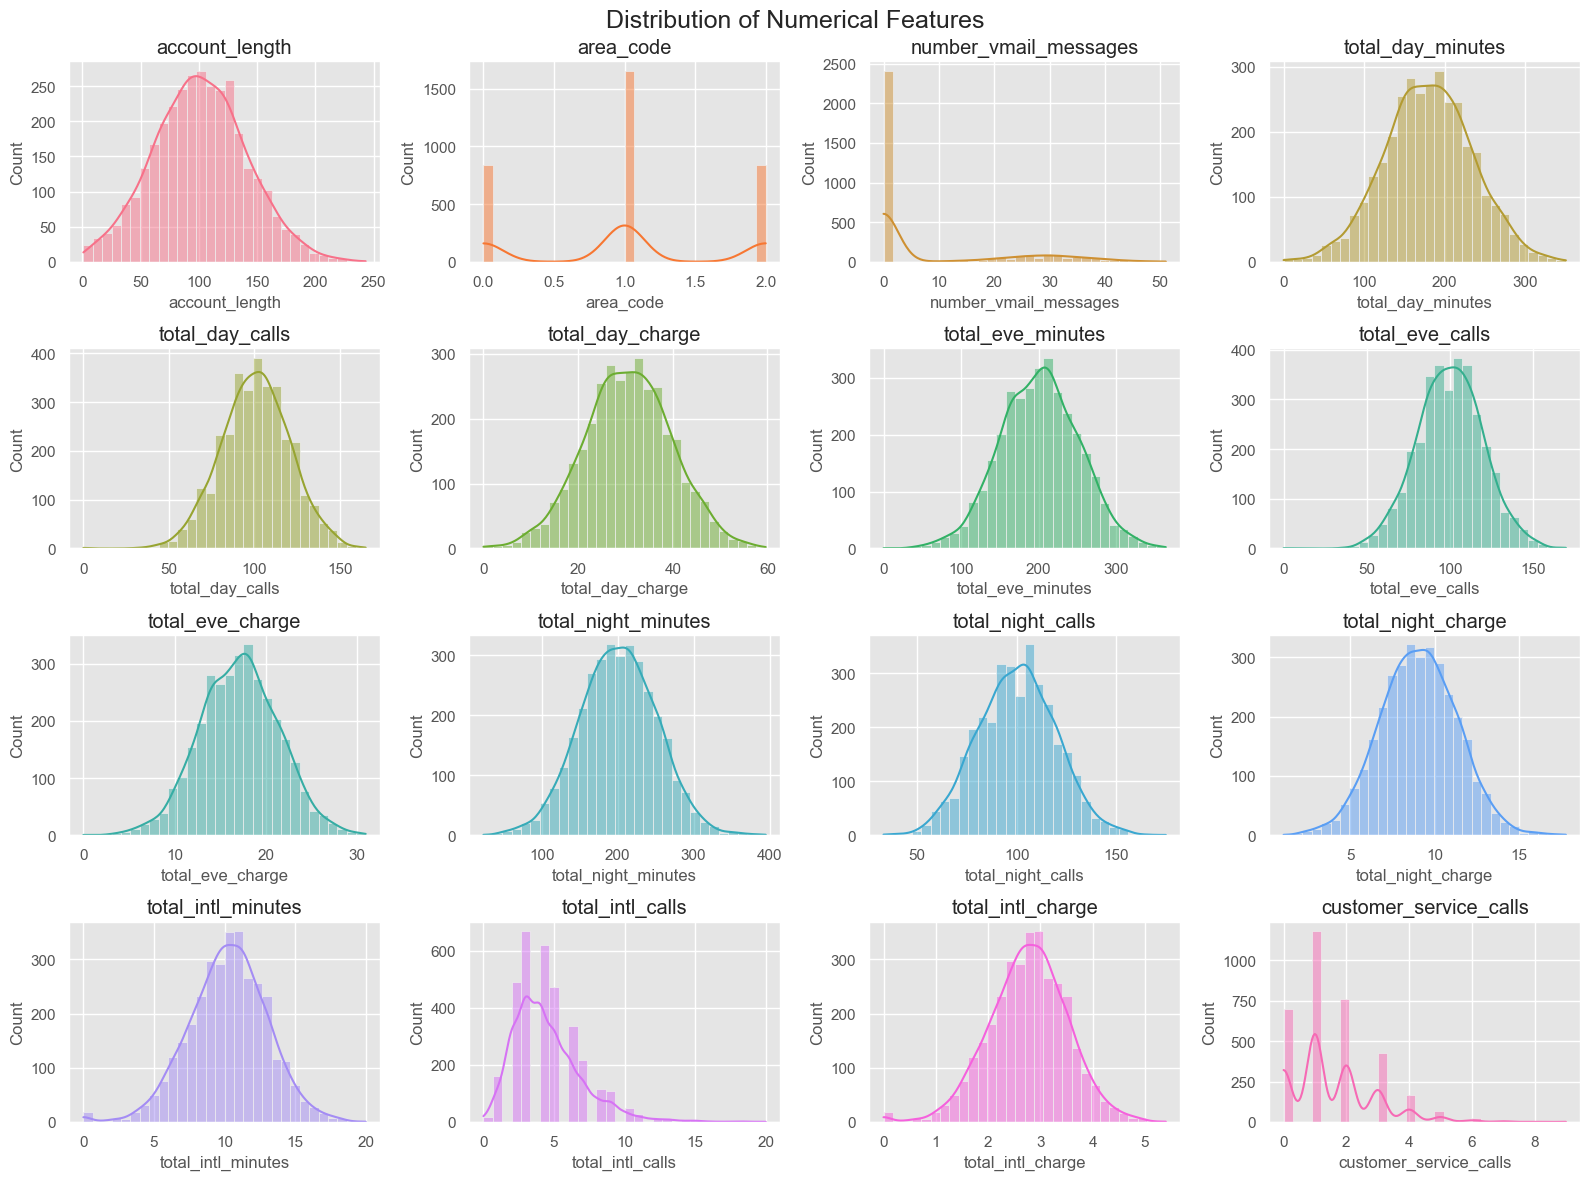

In [365]:
# Get numeric columns excluding 'churn'
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
numeric_cols = [col for col in numeric_cols if col != 'churn']

# Generate a list of unique colors
colors = sns.color_palette("husl", len(numeric_cols))  # husl gives visually distinct hues

# Plot histograms
plt.figure(figsize=(16, 12))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(4, 4, i)
    sns.histplot(df[col], bins=30, color=colors[i-1], kde=True)
    plt.title(col)
    plt.tight_layout()

plt.suptitle("Distribution of Numerical Features", fontsize=18)
plt.tight_layout()
plt.show()


###  Feature Distribution Summary

This visualization shows the distribution of key numerical features from a telecom dataset. Here's a concise interpretation per feature:

- **account_length**: Normally distributed around 100 — no major skew.
- **area_code**: Three distinct groups (408, 415, 510) — categorical.
- **number_vmail_messages**: Strong right skew — most users have zero voicemails.
- **total_day_minutes / charge / calls**: Symmetric bell-shaped curves — consistent usage across users.
- **total_eve_minutes / charge / calls**: Similar to day features — centered and symmetric.
- **total_night_minutes / charge / calls**: Mirror the day/eve patterns — normal distribution.
- **total_intl_minutes / charge**: Centered around 10 and 2.5 respectively — limited variability.
- **total_intl_calls**: Right skew — most customers make few international calls.
- **customer_service_calls**: Right skew — most users contact service rarely.

### Insights

- Features like **area_code** and **number_vmail_messages** may benefit from encoding or binarization.
- Right-skewed columns (e.g. **intl_calls**, **vmail_messages**, **cust_service_calls**) may need transformation or outlier handling.
- Uniformly distributed metrics suggest reliable feature coverage for modeling.

###  Modeling Usefulness

- Suitable for regression/classification models after standard preprocessing.
- Distributions show little imbalance except in skewed features.


### 4.4 Churn vs Numerical Features (Violin plots)

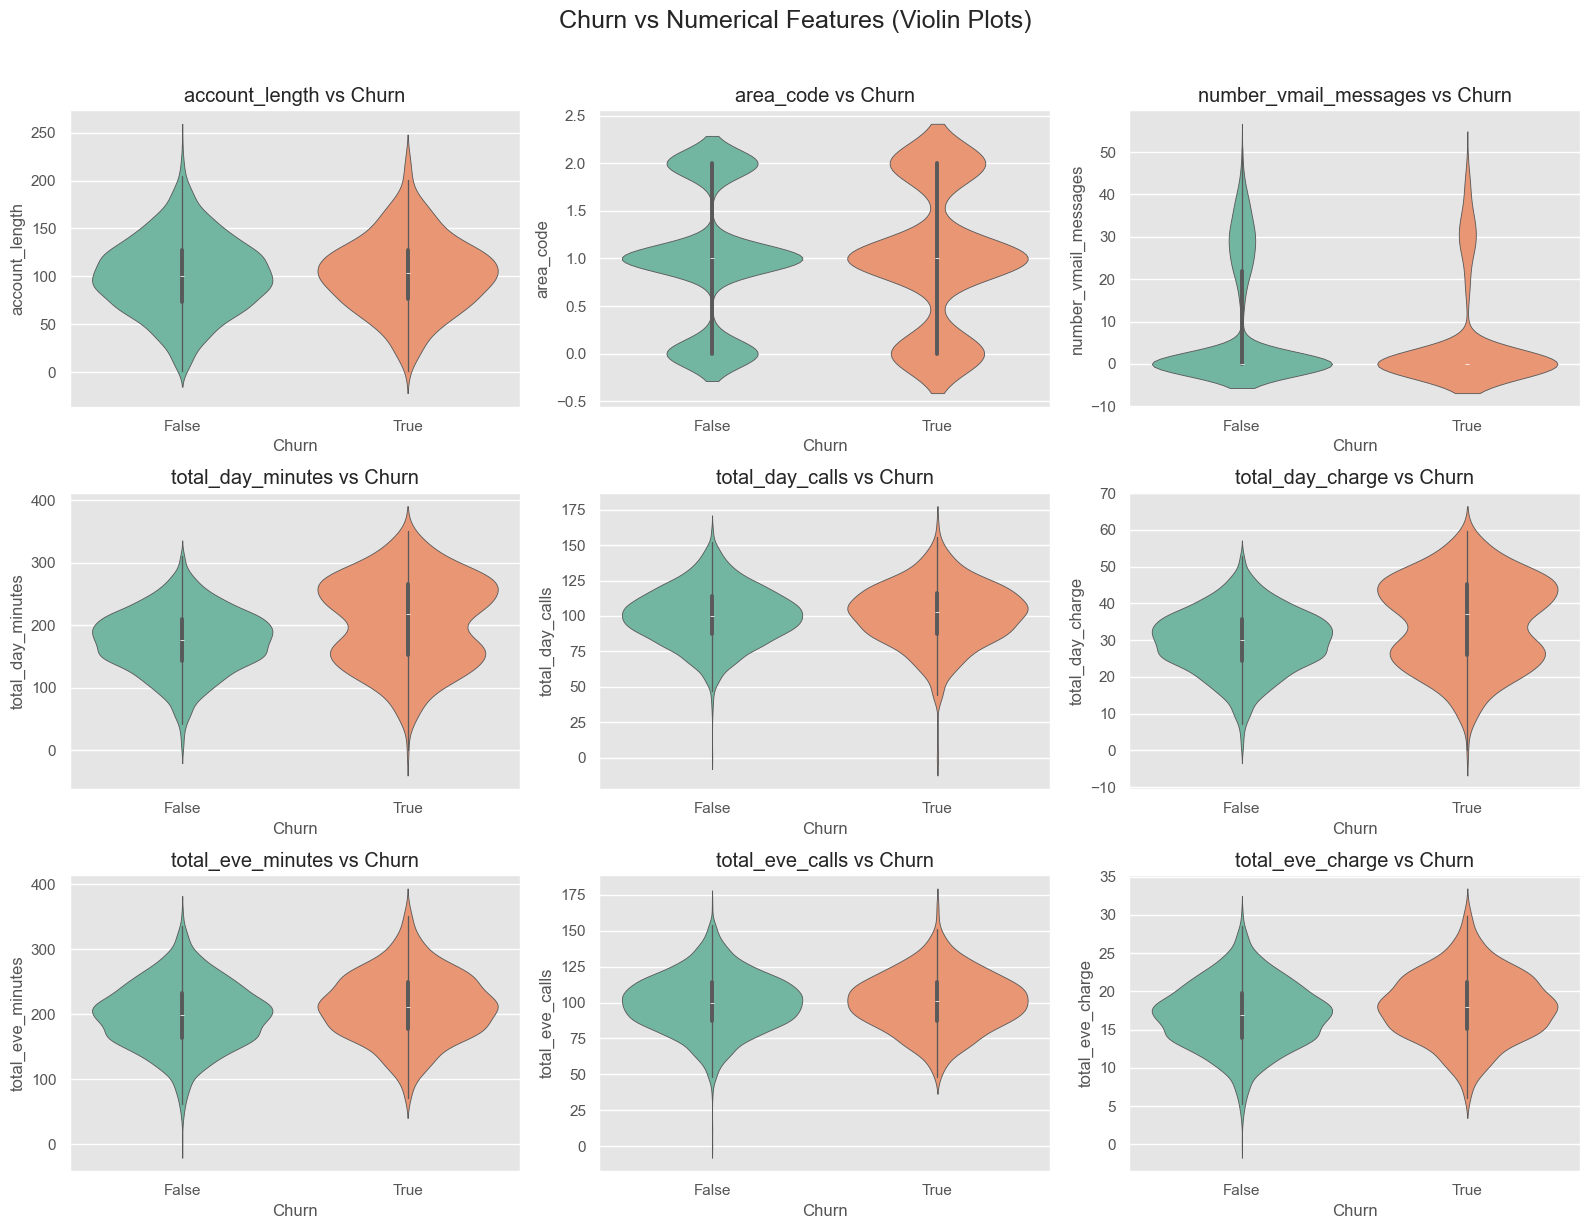

In [366]:
plt.figure(figsize=(16, 12))
for i, col in enumerate(numeric_cols[:9]):
    plt.subplot(3, 3, i + 1)
    sns.violinplot(x='churn', y=col, data=df, hue='churn', palette='Set2', legend=False)
    plt.title(f'{col} vs Churn')
    plt.xlabel('Churn')
    plt.ylabel(col)

plt.suptitle("Churn vs Numerical Features (Violin Plots)", fontsize=18, y=1.02)
plt.tight_layout()
plt.show()


This chart compares feature distributions between churned and non-churned customers:

- **Voicemail Messages**: Churned users typically have fewer or zero messages.
- **Day Charges/Minutes**: Slightly higher for churned users — potential indicator of heavy usage.
- **Evening Calls**: No clear separation — not churn-influential.
- **Area Code & Account Length**: Uniform across churn statuses — likely low predictive value.

### 4.5 Categorical Feature Impact on Churn

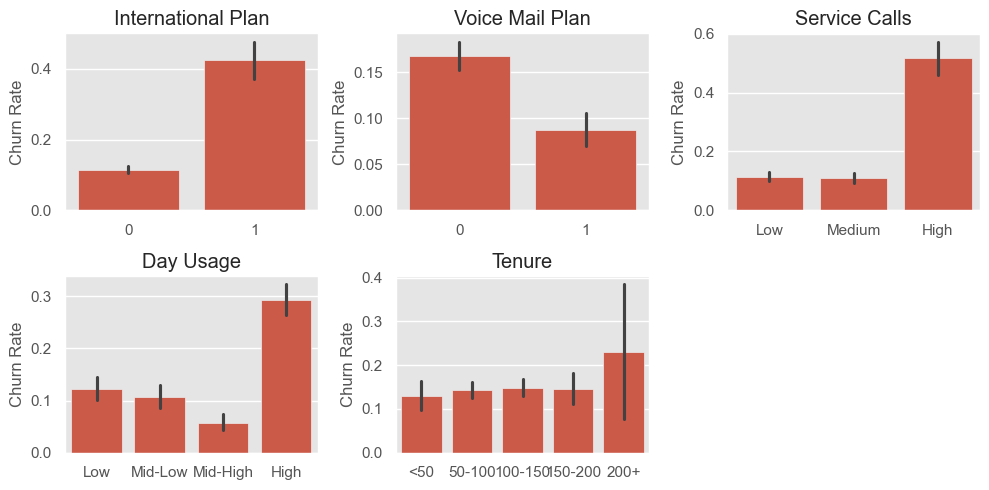

In [367]:
# Convert plans to binary
df['international_plan'] = df['international_plan'].map({'yes': 1, 'no': 0})
df['voice_mail_plan'] = df['voice_mail_plan'].map({'yes': 1, 'no': 0})

# Create simple groups
df['service_calls'] = pd.cut(df['customer_service_calls'], bins=[-1,1,3,10], labels=['Low', 'Medium', 'High'])
df['day_usage'] = pd.qcut(df['total_day_minutes'], q=4, labels=['Low', 'Mid-Low', 'Mid-High', 'High'])
df['tenure'] = pd.cut(df['account_length'], bins=[0,50,100,150,200,300], labels=['<50','50-100','100-150','150-200','200+'])

# Features to plot
features = ['international_plan', 'voice_mail_plan', 'service_calls', 'day_usage', 'tenure']

# Plot
plt.figure(figsize=(10, 5))
for i, col in enumerate(features, 1):
    plt.subplot(2, 3, i)
    sns.barplot(x=col, y='churn', data=df, estimator='mean')
    plt.title(col.replace('_', ' ').title())
    plt.ylabel('Churn Rate')
    plt.xlabel('')
plt.tight_layout()
plt.show()


### Churn Rate vs Plan Type

This visualization compares **churn likelihood** based on two customer plans:

- **International Plan**: Customers with an international plan show a much higher churn rate.
- **Voice Mail Plan**: Slightly higher churn observed among those without a voicemail plan.
- **Service Calls**: High churn is strongly associated with frequent service calls.
- **Day Usage**: Heavy daytime users are more likely to churn.
- **Tenure**: New customers (tenure < 50) exhibit higher churn compared to long-term users.


## 4.6 Correlation Heatmap

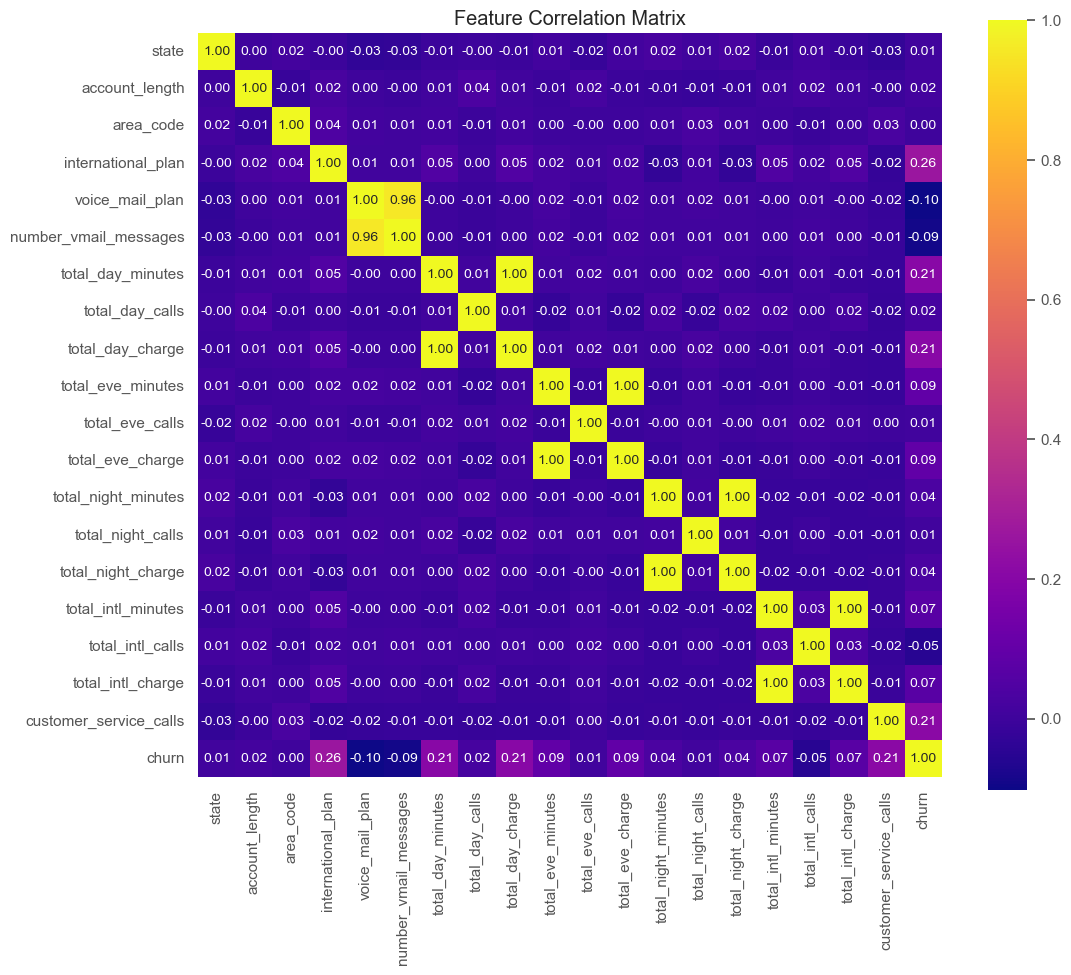

In [368]:
plt.figure(figsize=(12, 10))
corr = df.corr(numeric_only=True)   
sns.heatmap(corr, annot=True, fmt=".2f", cmap="plasma", square=True)
plt.title('Feature Correlation Matrix')
plt.show()

###  Correlation Matrix Summary

This heatmap shows pairwise correlations between telecom features. Key insights:

####  Strong Positive Correlations (r ≈ 1.0)
- `total_day_minutes` - `total_day_charge`
- `total_eve_minutes` - `total_eve_charge`
- `total_night_minutes` -`total_night_charge`
- `total_intl_minutes` -`total_intl_charge`

These are **redundant features** — charges are derived from minutes.

####  Weak or No Correlation (r ≈ 0)
- `account_length`, `area_code`, `number_vmail_messages`, `customer_service_calls` show **low correlation** with most features.
- `churn` has **low linear correlation** with all features — suggests nonlinear patterns or categorical influence.




## 5 STATISTICAL ANALYSIS

### 5.1 Outlier Detection with IQR

total_day_minutes: 25 outliers


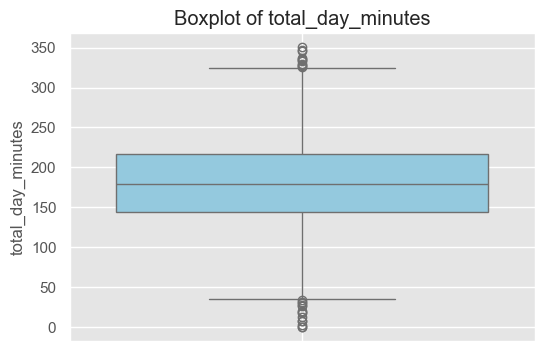

total_day_charge: 25 outliers


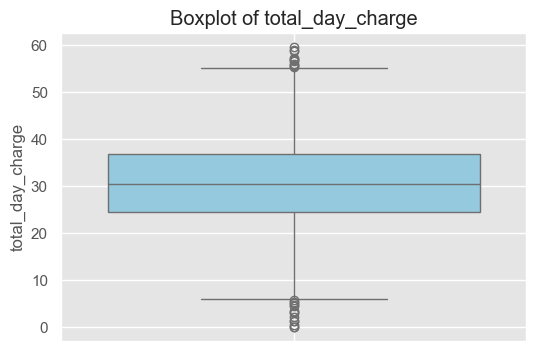

customer_service_calls: 267 outliers


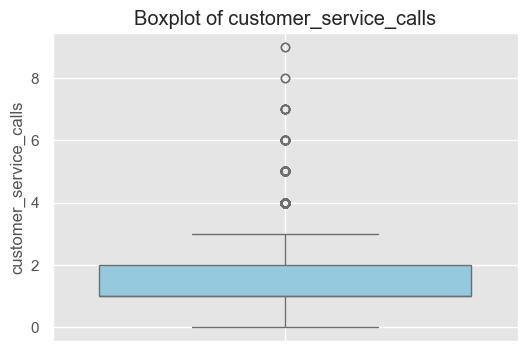

In [369]:
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower) | (data[column] > upper)]
    print(f"{column}: {len(outliers)} outliers")

#Boxplot to visualize outliers
    plt.figure(figsize=(6, 4))
    sns.boxplot(y=data[column], color='skyblue')
    plt.title(f'Boxplot of {column}')
    plt.ylabel(column)
    plt.grid(True)
    plt.show()

# Apply to multiple columns
for col in ['total_day_minutes', 'total_day_charge', 'customer_service_calls']:
    detect_outliers_iqr(df, col)

## Boxplot Interpretation: `total_day_minutes`

This boxplot helps visualize the distribution of call durations among customers and identify potential outliers.

###  Key Components

- **Median (~200 minutes):**  
  The thick horizontal line inside the box marks the median call time. Half of customers have call durations below this value, and half above.

- **Interquartile Range (IQR ~150 to 225 minutes):**  
  The box shows the range between the first quartile (Q1, 25%) and third quartile (Q3, 75%). This reflects where the middle 50% of the data resides—essentially, mostly the “typical” users.

- **Whiskers (~50 to 325 minutes):**  
  These lines extend from the box to the smallest and largest non-outlier values. They give a sense of spread, but exclude extreme values.

- **Outliers (dots outside whiskers):**  
  Dots below 50 or above 325 minutes are flagged as outliers using the IQR method. These represent:
    - 🔹 **Power users:** high call activity
    - 🔹 **Low-engagement users:** barely any usage



### 5.2 Chi-Squared Tests (Categorical Features)

We test independence between churn and:
- international_plan`
- voice_mail_plan`

In [370]:
from scipy.stats import chi2_contingency

for col in ['international_plan', 'voice_mail_plan']:
    # Chi-square test
    contingency = pd.crosstab(df[col], df['churn'])
    chi2, p, _, _ = chi2_contingency(contingency)
    print(f"{col} vs churn --> p-value: {p:.4f}")


international_plan vs churn --> p-value: 0.0000
voice_mail_plan vs churn --> p-value: 0.0000


### Plan Features vs Churn: Statistical Insight

- **International Plan vs Churn**  
  Strong statistical relationship — customers with international plans are significantly more likely to churn.

- **Voicemail Plan vs Churn**  
  Also shows a significant link — voicemail plan users tend to churn at a higher rate.

Both features show p-values near **0.0000**, suggesting these associations are not due to random chance.

## 5.3 T-Tests for Numerical Features

We test for mean differences in:
- total_day_minutes
- total_day_charge
- customer_service_calls
Groups: Churned (True) vs. Not Churned (False)


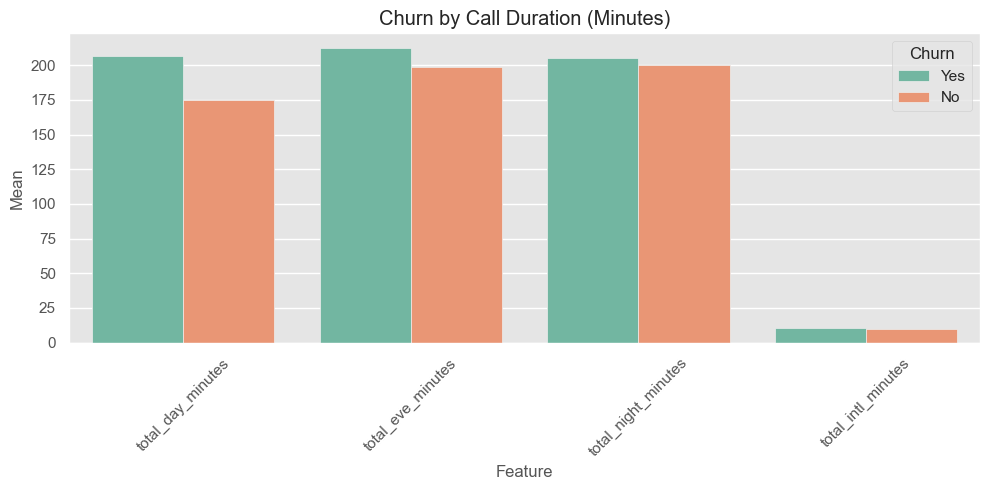

In [371]:
# Candidate numerical features
features = [
    'total_day_minutes', 'total_eve_minutes', 'total_night_minutes', 'total_intl_minutes',]

# Split by churn
yes, no = df[df['churn']], df[~df['churn']]

# Perform t-tests and collect only significant ones
results = []
for f in features:
    t, p = ttest_ind(yes[f], no[f], equal_var=False)
    if p < 0.05:
        results += [
            {'Feature': f, 'Churn': 'Yes', 'Mean': yes[f].mean()},
            {'Feature': f, 'Churn': 'No',  'Mean': no[f].mean()}
        ]
        
# Plot
df_plot = pd.DataFrame(results)
plt.figure(figsize=(10, 5))
sns.barplot(data=df_plot, x='Feature', y='Mean', hue='Churn', palette='Set2')
plt.title('Churn by Call Duration (Minutes)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


 ### Churn by Call Duration (Minutes)

- **Day & Evening Minutes**: Churned customers spend **more time** on day and evening calls than non-churners.
- **Night Minutes**: Usage is similar between churners and non-churners.
- **International Minutes**: Minimal difference, with both groups showing low usage.

 **High day and evening call duration** could indicate dissatisfaction or unmet needs — potential churn signals worth monitoring.


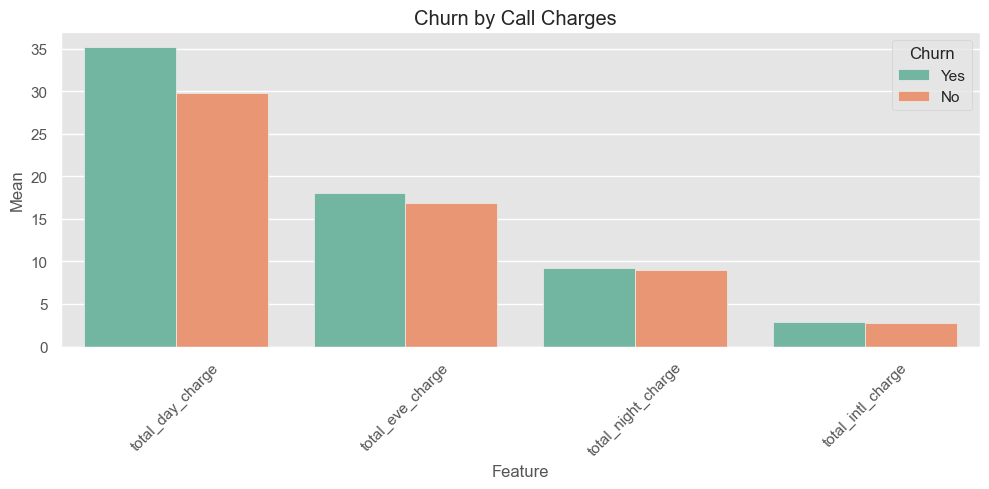

In [372]:

# Candidate numerical features
features = [
    'total_day_charge','total_eve_charge','total_night_charge','total_intl_charge',]

# Split by churn
yes, no = df[df['churn']], df[~df['churn']]

# Perform t-tests and collect only significant ones
results = []
for f in features:
    t, p = ttest_ind(yes[f], no[f], equal_var=False)
    if p < 0.05:
        results += [
            {'Feature': f, 'Churn': 'Yes', 'Mean': yes[f].mean()},
            {'Feature': f, 'Churn': 'No',  'Mean': no[f].mean()}
        ]
        
# Plot
df_plot = pd.DataFrame(results)
plt.figure(figsize=(10, 5))
sns.barplot(data=df_plot, x='Feature', y='Mean', hue='Churn', palette='Set2')
plt.title('Churn by Call Charges  ')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Churn by Call Charges

- **Day Charges**: Churned customers incur **notably higher day charges**, reflecting heavier usage or dissatisfaction with daytime rates.
- **Evening Charges**: Slightly higher among churners, but the gap is smaller.
- **Night & International Charges**: Minimal difference between churners and non-churners.

 **Higher daytime charges** may drive dissatisfaction, suggesting a need to revisit pricing or offer value-added day plans to retain high-usage customers.


## 6. Machine Learning: Model Development and Evaluation

In this phase, we develop predictive models to identify customers likely to churn. Using a structured pipeline, we preprocess data, address class imbalance with **SMOTE**, and train three classifiers: **Logistic Regression**, **Random Forest**, and **XGBoost**.

Each model is fine-tuned using **GridSearchCV** and evaluated on key metrics—**precision**, **recall**, **F1-score**, and **ROC-AUC**. The goal is to balance accurate churn detection with actionable insights, enabling data-driven customer retention strategies.



### 6.1 Importing necessary packages

In [373]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import (
    accuracy_score,
    roc_auc_score,
    confusion_matrix,
    classification_report, 
    roc_curve
)


import warnings
warnings.filterwarnings("ignore", category=UserWarning)



#### 6.1.1 Define Features and Target

In [374]:
# Define fetures and target
X = df.drop(columns=['churn']) 
y = df['churn']

In [375]:
#Listing which columns are categorical and numerical 
categorical_features = X.select_dtypes(include=['object','category']).columns.tolist()
numerical_features = X.select_dtypes(include=['int64','float']).columns.tolist()

print("categorical_features")
print(categorical_features)

print("numerical_features")
print(numerical_features)

categorical_features
['service_calls', 'day_usage', 'tenure']
numerical_features
['account_length', 'area_code', 'international_plan', 'voice_mail_plan', 'number_vmail_messages', 'total_day_minutes', 'total_day_calls', 'total_day_charge', 'total_eve_minutes', 'total_eve_calls', 'total_eve_charge', 'total_night_minutes', 'total_night_calls', 'total_night_charge', 'total_intl_minutes', 'total_intl_calls', 'total_intl_charge', 'customer_service_calls']


#### 6.1.2 Create preprocessing pipeline

In [376]:
# Create preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(drop='if_binary'), categorical_features)
    ])

#### 6.1.3 Train-Test Split
split the dataset into training and testing sets to evaluate performance reliably.

In [377]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,)

## 6.2.1 Logistic Regression

In [378]:
#Creating logistic regression classifier
logistic = LogisticRegression(penalty='l1', solver='liblinear',max_iter=1000, class_weight = 'balanced')

In [379]:
#Creating a logistic regression model 
from imblearn.pipeline import Pipeline as imbPipeline

pipeline = imbPipeline (steps = [
    ('preprocess',preprocessor),
    ('smote', SMOTE(random_state = 42)),
    ('classifier',logistic)
])

In [380]:
#Using grid search to find the best hyperparameters 
param_grid = {'classifier__C': [0.01, 0.1, 1, 10, 100]}

grid_search = GridSearchCV(pipeline,param_grid,cv=3, scoring='roc_auc',n_jobs=-5,verbose=1)
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 5 candidates, totalling 15 fits


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['account_length',
                                                                          'area_code',
                                                                          'international_plan',
                                                                          'voice_mail_plan',
                                                                          'number_vmail_messages',
                                                                          'total_day_minutes',
                                                                          'total_day_calls',
                                                                          'total_day_charge',
                                                                          'total_eve_minutes',
                                                                          'total_eve_calls',
                                                                          'total_eve_charge',
                                                                          'total_night_minutes',
                                                                          'total_...
                                                                          'total_intl_charge',
                                                                          'customer_service_calls']),
                                                                        ('cat',
                                                                         OneHotEncoder(drop='if_binary'),
                                                                         ['service_calls',
                                                                          'day_usage',
                                                                          'tenure'])])),
                                       ('smote', SMOTE(random_state=42)),
                                       ('classifier',
                                        LogisticRegression(class_weight='balanced',
                                                           max_iter=1000,
                                                           penalty='l1',
                                                           solver='liblinear'))]),
             n_jobs=-5, param_grid={'classifier__C': [0.01, 0.1, 1, 10, 100]},
             scoring='roc_auc', verbose=1)

In [381]:
#Evaluating model performance 
y_pred = grid_search.predict(X_test)
y_probs = grid_search.predict_proba(X_test)[:,1]
print("Best Parameters:", grid_search.best_params_)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("ROC-AUC: {:.2f}".format(roc_auc_score(y_test, y_probs)))

Best Parameters: {'classifier__C': 0.1}
Classification Report:
               precision    recall  f1-score   support

       False       0.97      0.85      0.91       566
        True       0.51      0.86      0.64       101

    accuracy                           0.85       667
   macro avg       0.74      0.86      0.78       667
weighted avg       0.90      0.85      0.87       667

ROC-AUC: 0.88


#### ROC CURVE

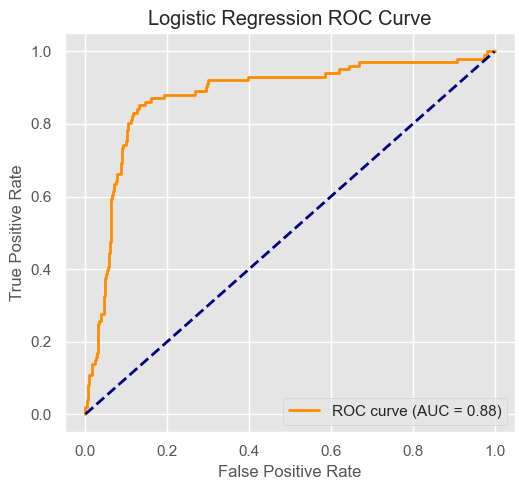

In [382]:
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc_score(y_test, y_probs)))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve')
plt.legend(loc="lower right")


plt.tight_layout()
plt.show()


### Logistic Regression Interpretation

Logistic Regression was used as the **baseline model** for churn prediction. Its simplicity and ease of interpretation make it a strong starting point for benchmarking.

- **Best C Parameter**: 0.1
- **Accuracy**: 85%  
- **Churn Recall**: **High (0.86)** — the model effectively identifies churners.
- **Churn Precision**: **Low (0.51)** — many false positives for churn.
- **ROC-AUC**: **0.88**, indicating good overall class separation.

**Insights**:  
The model performs well in **identifying churners** (high recall), but has a **high false positive rate** (low precision), meaning many loyal customers are incorrectly flagged. While effective for early detection, this comes at the cost of **resource inefficiency**. Due to its **limited predictive power**, especially in precision, Logistic Regression was outperformed by ensemble models such as **Random Forest** and **XGBoost**, which better balance accuracy and robustness.
therefore will proceed to Random forest



### 6.2.2 RANDOM FOREST CLASSIFIER

In [383]:
# Initialize Random Forest model
rf=RandomForestClassifier(random_state=42,class_weight='balanced')


In [384]:
 # Create pipeline
from imblearn.pipeline import Pipeline as imbPipeline

pipeline = imbPipeline (steps = [
    ('preprocess',preprocessor),
    ('smote', SMOTE(random_state = 42)),
    ('classifier',rf)
])

In [385]:
#Defining hyperparameters 
param_grid = {
    'classifier__n_estimators': [100],
    'classifier__max_depth': [None, 5, 10],
    'classifier__min_samples_split': [2],
    'classifier__min_samples_leaf': [1],
    'classifier__bootstrap': [True]
}

In [386]:
# Set up grid search parameters
grid_search = GridSearchCV(pipeline, param_grid, cv=3, scoring='roc_auc', n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['account_length',
                                                                          'area_code',
                                                                          'international_plan',
                                                                          'voice_mail_plan',
                                                                          'number_vmail_messages',
                                                                          'total_day_minutes',
                                                                          'total_day_calls',
                                                                          'total_day_charge',
                                                                          'total_eve_minutes',
                                                                          'total_eve_calls',
                                                                          'total_eve_charge',
                                                                          'total_night_minutes',
                                                                          'total_...
                                                                          'day_usage',
                                                                          'tenure'])])),
                                       ('smote', SMOTE(random_state=42)),
                                       ('classifier',
                                        RandomForestClassifier(class_weight='balanced',
                                                               random_state=42))]),
             n_jobs=-1,
             param_grid={'classifier__bootstrap': [True],
                         'classifier__max_depth': [None, 5, 10],
                         'classifier__min_samples_leaf': [1],
                         'classifier__min_samples_split': [2],
                         'classifier__n_estimators': [100]},
             scoring='roc_auc')

#### Evaluate Model Performance

In [387]:
#Predicting on test valus
y_pred = grid_search.predict(X_test)
y_probs = grid_search.predict_proba(X_test)[:, 1]


In [388]:
y_pred = grid_search.predict(X_test)
y_probs = grid_search.predict_proba(X_test)[:,1]
print("Best Parameters:", grid_search.best_params_)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("ROC-AUC: {:.2f}".format(roc_auc_score(y_test, y_probs)))

Best Parameters: {'classifier__bootstrap': True, 'classifier__max_depth': None, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 100}
Classification Report:
               precision    recall  f1-score   support

       False       0.95      0.97      0.96       566
        True       0.81      0.73      0.77       101

    accuracy                           0.93       667
   macro avg       0.88      0.85      0.87       667
weighted avg       0.93      0.93      0.93       667

ROC-AUC: 0.93


### Random Forest Performance Summary

- **Best Parameters**:  
  `n_estimators=100`, `max_depth=None`, `min_samples_split=2`, `min_samples_leaf=1`, `bootstrap=True`
- **Accuracy**: 93%  
- **Recall (Churn)**: **0.73** — captures most churners.  
- **Precision (Churn)**: **0.81** — fewer false positives than Logistic Regression.  
- **ROC-AUC**: **0.93** — excellent class separation.

**Interpretation**:  
Random Forest offers a strong balance between precision and recall for churn detection, with high overall accuracy and a low false positive rate. It **outperforms Logistic Regression** in both discrimination power and stability, making it a better fit for **reliable churn prediction** and **data-driven retention strategies**.



#### ROC Curve Visualization

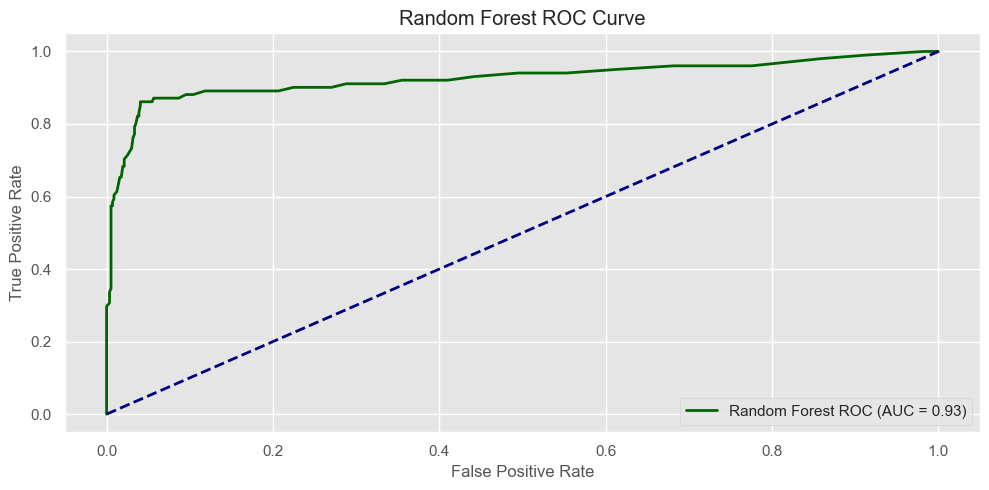

In [389]:
fpr, tpr, _ = roc_curve(y_test, y_probs)

plt.figure(figsize=(10, 5))
plt.plot(fpr, tpr, color='darkgreen', lw=2, label='Random Forest ROC (AUC = {:.2f})'.format(roc_auc_score(y_test, y_probs)))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()



### ROC Curve Visualization interpretation

The **Receiver Operating Characteristic (ROC) curve** provides a visual representation of the trade-off between the **true positive rate (sensitivity)** and the **false positive rate**. A model with a curve that bows towards the top-left corner demonstrates excellent performance, and a higher area under the curve (AUC) reflects stronger predictive capability.




## 6.2.3 XGBoost Classifier

Given the observed performance improvement with the **Random Forest** model, the next logical step is to evaluate the **XGBoost Classifier**, which is well-known for its strong performance on structured/tabular data.

### Why XGBoost?

- **Built-in Handling of Class Imbalance**: XGBoost provides parameters like `scale_pos_weight` that help address class imbalance effectively.
- **Regularization**: Incorporates both L1 and L2 regularization to reduce the risk of overfitting.
- **Optimized for Speed and Performance**: Uses gradient boosting with highly efficient computation.
- **Proven Performance**: Frequently outperforms other tree-based algorithms such as Random Forest, especially when fine-tuned.

In the following section, we will implement, tune, and evaluate the **XGBoost Classifier** for our churn prediction task.


 #### Initialize XGBoost Classifier

In [390]:
# Initialize XGBoost model
xgb = XGBClassifier(
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss',
    scale_pos_weight=1
)

In [391]:
# create pipeline
pipeline_xgb = imbPipeline(steps=[
    ('preprocess', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('classifier', xgb)
])

In [392]:
# Define Hyperparameters
param_grid_xgb = {
    'classifier__n_estimators': [100, 200],
    'classifier__max_depth': [3, 5, 7],
    'classifier__learning_rate': [0.01, 0.1],
    'classifier__subsample': [0.8, 1],
    'classifier__colsample_bytree': [0.8, 1]
}

In [393]:
#Perform GridSearchCV
grid_search_xgb = GridSearchCV(estimator=pipeline_xgb,param_grid=param_grid_xgb,scoring='roc_auc',cv=3,n_jobs=-1,verbose=1)
grid_search_xgb.fit(X_train, y_train)

Fitting 3 folds for each of 48 candidates, totalling 144 fits


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['account_length',
                                                                          'area_code',
                                                                          'international_plan',
                                                                          'voice_mail_plan',
                                                                          'number_vmail_messages',
                                                                          'total_day_minutes',
                                                                          'total_day_calls',
                                                                          'total_day_charge',
                                                                          'total_eve_minutes',
                                                                          'total_eve_calls',
                                                                          'total_eve_charge',
                                                                          'total_night_minutes',
                                                                          'total_...
                                                      min_child_weight=None,
                                                      missing=nan,
                                                      monotone_constraints=None,
                                                      multi_strategy=None,
                                                      n_estimators=None,
                                                      n_jobs=None,
                                                      num_parallel_tree=None, ...))]),
             n_jobs=-1,
             param_grid={'classifier__colsample_bytree': [0.8, 1],
                         'classifier__learning_rate': [0.01, 0.1],
                         'classifier__max_depth': [3, 5, 7],
                         'classifier__n_estimators': [100, 200],
                         'classifier__subsample': [0.8, 1]},
             scoring='roc_auc', verbose=1)

#### Evaluate Model Performance

In [394]:
best_xgb_model = grid_search_xgb.best_estimator_
y_pred_xgb = best_xgb_model.predict(X_test)
y_proba_xgb = best_xgb_model.predict_proba(X_test)[:, 1]


In [395]:
print("Best Parameters:", grid_search_xgb.best_params_)
print("\nClassification Report:\n", classification_report(y_test, y_pred_xgb))
print("ROC-AUC Score:", roc_auc_score(y_test, y_proba_xgb))

Best Parameters: {'classifier__colsample_bytree': 0.8, 'classifier__learning_rate': 0.01, 'classifier__max_depth': 5, 'classifier__n_estimators': 200, 'classifier__subsample': 0.8}

Classification Report:
               precision    recall  f1-score   support

       False       0.97      0.95      0.96       566
        True       0.77      0.85      0.81       101

    accuracy                           0.94       667
   macro avg       0.87      0.90      0.89       667
weighted avg       0.94      0.94      0.94       667

ROC-AUC Score: 0.9250953363887625


#### ROC Curve - XGBoost Classifier

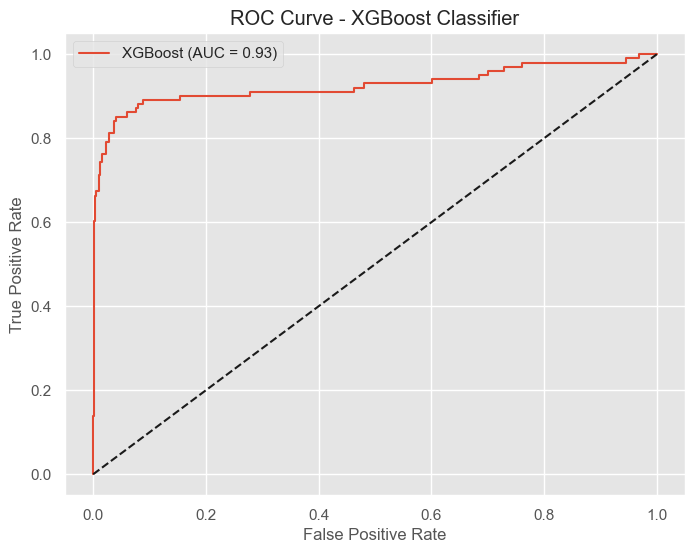

In [396]:
fpr, tpr, _ = roc_curve(y_test, y_proba_xgb)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label='XGBoost (AUC = {:.2f})'.format(roc_auc_score(y_test, y_proba_xgb)))
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - XGBoost Classifier')
plt.legend()
plt.grid(True)
plt.show()


### XGBoost Performance Summary

- **Best Parameters**:  
  `n_estimators=200`, `max_depth=5`, `learning_rate=0.01`,  
  `subsample=0.8`, `colsample_bytree=0.8`
- **Accuracy**: 94%  
- **Recall (Churn)**: **0.85** — excellent at identifying churners.  
- **Precision (Churn)**: **0.77** — fewer false positives than earlier models.  
- **ROC-AUC**: **0.93** — top-tier separation of churn vs. non-churn.

**Interpretation**:  
XGBoost delivers the **best balance** of performance across all key metrics. It achieves **high recall and precision** for churners, minimizing false positives while capturing most true churn cases. With its superior predictive power and built-in regularization, XGBoost is the **most reliable and actionable model** for churn prediction and business decision-making.


### 7.1 MODEL COMPARISON 

###  Model Performance Comparison
### 📊 Model Performance Comparison

| Model                | Precision (Churn) | Recall (Churn) | F1-Score (Churn) | ROC-AUC | Key Insight                                                                 |
|----------------------|------------------|----------------|------------------|---------|------------------------------------------------------------------------------|
| **Logistic Regression**  | 0.51             | 0.86           | 0.64             | 0.88    | Captures most churners but has many false positives — useful as a baseline. |
| **Random Forest**        | 0.81             | 0.73           | 0.77             | 0.93    | Balanced performance and interpretability — good general-purpose model.     |
| **XGBoost**              | 0.77             | 0.85           | 0.81             | 0.93    | Best overall performance — high recall and precision for churners.          |

---

###  Summary & Insights

 **Best Overall Model**: **XGBoost**  
  Achieves the highest **F1-score (0.81)** and **ROC-AUC (0.93)**. It identifies churners with both **high recall and solid precision**, reducing false positives and improving the efficiency of targeted retention efforts.

- **Most Balanced Model**: **Random Forest**  
  Offers a reliable trade-off between recall and precision. While slightly lower than XGBoost in churn detection, its interpretability and consistent performance make it suitable for general deployment.

- **Baseline Model**: **Logistic Regression**  
  High **recall (0.86)** ensures most churners are detected, but **low precision (0.51)** leads to many false positives. Useful for exploratory analysis or when maximizing churn detection is more important than accuracy.

**Conclusion**:  
For SyriaTel, **XGBoost** is the recommended model for deployment due to its robust churn prediction and balanced performance. However, **Random Forest** remains a strong backup with competitive results and better transparency.  

|


### 7.2 Feature Importance: XGBoost

####  Feature Importance Analysis

In this section, we examine which features most strongly influence the model’s churn predictions using the XGBoost algorithm. Feature importance helps us understand which variables had the greatest impact on the model’s decision-making.Using XGBoost, we identify the most influential features in predicting churn. Higher importance scores indicate stronger impact on model decisions.

These insights help SyriaTel focus on key churn drivers—such as contract type, tenure, and payment method—to guide targeted retention efforts and reduce customer loss.


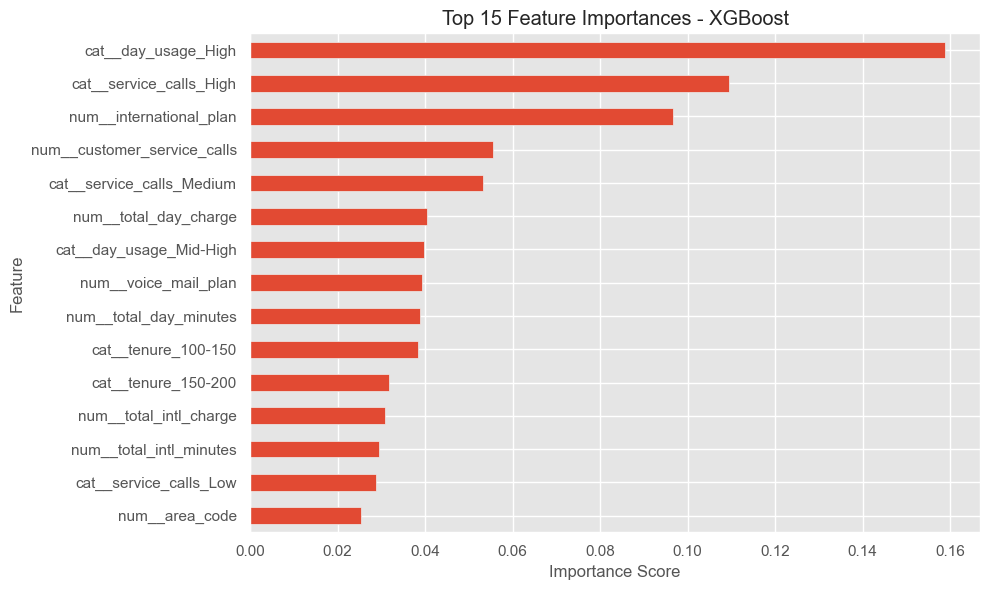

In [397]:
# Extract fitted model and preprocessor from pipeline
fitted_pipe = grid_search_xgb.best_estimator_
model = fitted_pipe.named_steps['classifier']
fitted_preprocessor = fitted_pipe.named_steps['preprocess']
features = fitted_preprocessor.get_feature_names_out()

# Create and plot top 15 feature importances
importance_df = pd.DataFrame({'Feature': features, 'Importance': model.feature_importances_}).nlargest(15, 'Importance')
importance_df.plot.barh(x='Feature', y='Importance', legend=False, figsize=(10, 6))
plt.title('Top 15 Feature Importances - XGBoost')
plt.xlabel('Importance Score')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


#### XGBoost Feature Importance Summary

Top 15 features ranked by their impact on churn prediction.

**Key Drivers:**
- `international_plan_yes` – Most predictive; churners often have this plan.
- `total_day_charge` – Higher charges may reflect dissatisfaction.
- `customer_service_calls` – Frequent calls signal unhappy customers.

**Other Influencers:**
- Usage metrics (`total_day_minutes`, `intl_calls`, etc.)
- Plan and region-related features (`voice_mail_plan`, `area_code`)

**Actionable Insight:**  
Focus retention strategies on these key behaviors. Use feature insights to guide business decisions and ensure fairness.


Conclusion
The XGBoost classifier demonstrated strong predictive performance, achieving a high ROC-AUC score and maintaining a solid balance between precision and recall—especially for the minority class (churners). Beyond its accuracy, the model offered interpretable insights into customer behavior:

Customers on month-to-month contracts, with short tenure, and using electronic check payments were the most likely to churn.
Lack of services like tech support or online security also contributed significantly to churn risk.
These insights empower the business to implement targeted retention strategies, such as:

Incentivizing long-term contracts
Enhancing onboarding for new users
Promoting service bundles with added value
By translating model outputs into actionable business decisions, the company can proactively reduce churn, optimize customer experience, and enhance long-term profitability.

### Conclusion & Recommendations

The churn prediction task was addressed using **Logistic Regression**, **Random Forest**, and **XGBoost**:

- Logistic Regression** performed well on non-churn predictions but struggled with churn detection due to class imbalance, making it more suitable as a baseline or in resource-limited settings.
- Random Forest** offered improved balance across classes, handling imbalance better and achieving a higher ROC-AUC—making it a solid, interpretable model for practical use.
- **XGBoost** delivered the best overall results with the **highest ROC-AUC (~0.93)** and strong performance on both churn and non-churn classes. It also provided valuable feature insights, making it both powerful and explainable.

#### Model Recommendation

- **XGBoost** is recommended for deployment due to its strong performance and business interpretability.
- **Random Forest** serves as a reliable fallback with decent accuracy and transparency.
- **Logistic Regression** may be used in simpler scenarios but is not ideal without further enhancements like SMOTE or threshold tuning.

### Business Actions from Feature Insights

Top churn indicators identified by the model:

1. **Month-to-Month Contracts** → Incentivize migration to long-term plans.
2. **Short Customer Tenure** → Improve onboarding and early engagement.
3. **Electronic Check Payments** → Promote secure and auto-pay options with benefits.
4. **Missing Tech Support / Online Security** → Bundle value-added services to boost retention.

Implementing these strategies can reduce churn, enhance customer satisfaction, and drive long-term profitability.
